### Création des données factices :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Création d'un DataFrame factice avec des données aléatoires
np.random.seed(42)
date = pd.date_range(start='2022-01-01', end='2022-04-15')
data = {
    'Date': date,
    'Ventes': np.random.randint(100, 1000, size=len(date)),
    'Produit': np.random.choice(['A', 'B', 'C'], size=len(date))
}
df = pd.DataFrame(data)

In [2]:
df.head()

,Date,Ventes,Produit
0,2022-01-01,202,A
1,2022-01-02,535,A
2,2022-01-03,960,B
3,2022-01-04,370,C
4,2022-01-05,206,A


1. **Tracé d'une série temporelle des ventes** :
   Tracez un graphe montrant l'évolution des ventes au fil du temps.

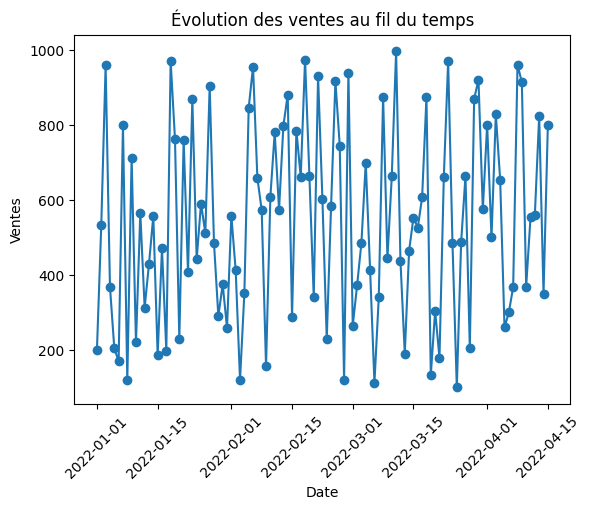

In [13]:
plt.plot(df['Date'], df['Ventes'], marker='o')
plt.title('Évolution des ventes au fil du temps')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.show()

2. **Histogramme des ventes par produit** :
   Tracez un histogramme montrant la répartition des ventes par produit.

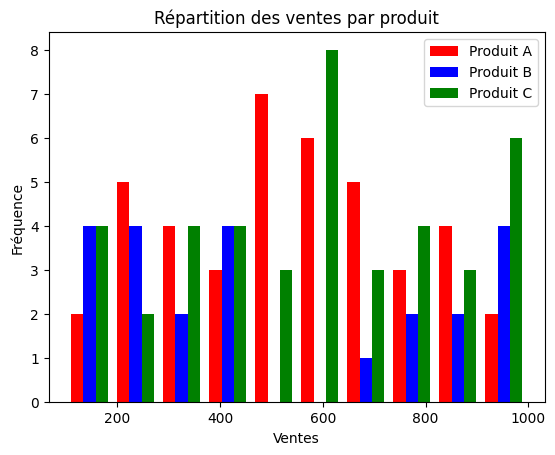

In [4]:
plt.hist([df[df['Produit'] == 'A']['Ventes'], df[df['Produit'] == 'B']['Ventes'], df[df['Produit'] == 'C']['Ventes']], 
         color=['red', 'blue', 'green'], label=['Produit A', 'Produit B', 'Produit C'])
plt.title('Répartition des ventes par produit')
plt.xlabel('Ventes')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

3. **Diagramme circulaire des ventes par produit** :
   Tracez un diagramme circulaire montrant la part de chaque produit dans les ventes totales.

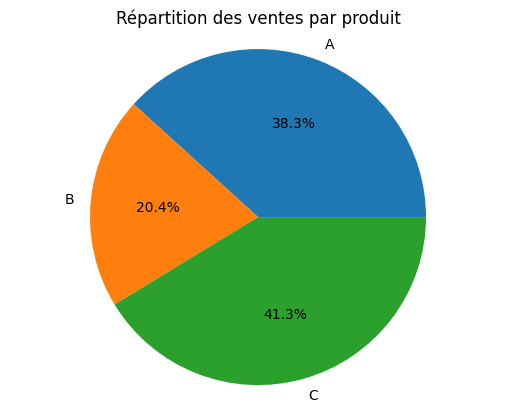

In [5]:
ventes_par_produit = df.groupby('Produit')['Ventes'].sum()
plt.pie(ventes_par_produit, labels=ventes_par_produit.index, autopct='%1.1f%%')
plt.title('Répartition des ventes par produit')
plt.axis('equal')
plt.show()

4. **Diagramme en barres des ventes par jour** :
   Tracez un diagramme en barres montrant les ventes pour chaque jour.

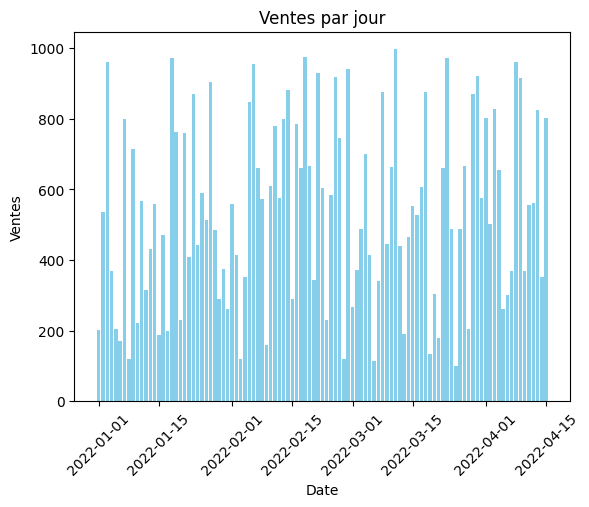

In [6]:
plt.bar(df['Date'], df['Ventes'], color='skyblue')
plt.title('Ventes par jour')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.show()

5. **Diagramme en secteurs des ventes par mois** :
   Tracez un diagramme en secteurs montrant la répartition des ventes par mois.

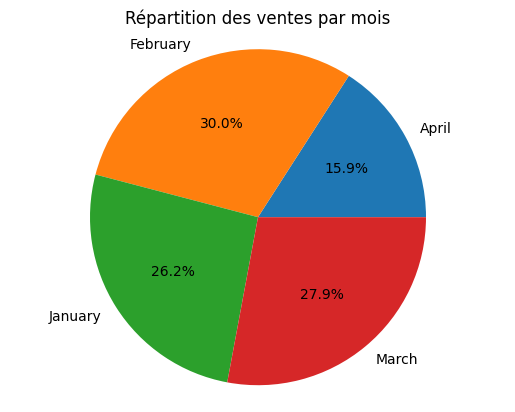

In [7]:
df['Mois'] = df['Date'].dt.month_name()
ventes_par_mois = df.groupby('Mois')['Ventes'].sum()
plt.pie(ventes_par_mois, labels=ventes_par_mois.index, autopct='%1.1f%%')
plt.title('Répartition des ventes par mois')
plt.axis('equal')
plt.show()

6. **Boîte à moustaches des ventes par produit** :
   Tracez un diagramme en boîte montrant la distribution des ventes pour chaque produit.

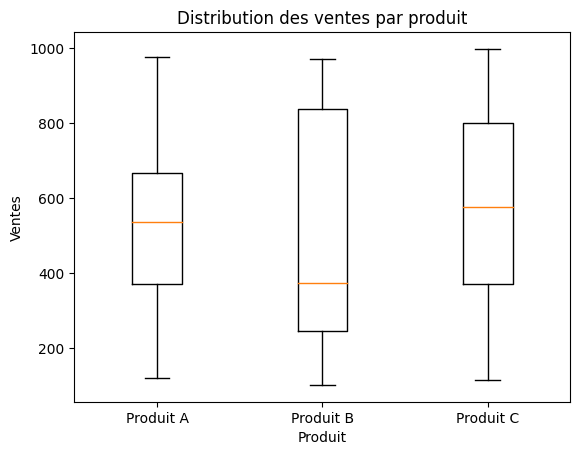

In [8]:
plt.boxplot([df[df['Produit'] == 'A']['Ventes'], df[df['Produit'] == 'B']['Ventes'], df[df['Produit'] == 'C']['Ventes']], 
            labels=['Produit A', 'Produit B', 'Produit C'])
plt.title('Distribution des ventes par produit')
plt.xlabel('Produit')
plt.ylabel('Ventes')
plt.show()

7. **Violin plot des ventes par produit** :
   Tracez un diagramme en violon montrant la distribution des ventes pour chaque produit.

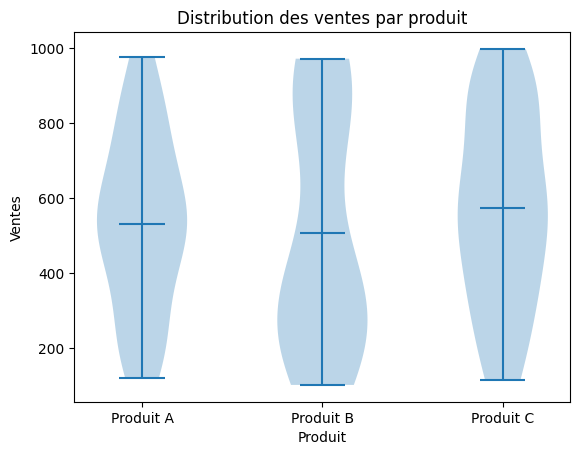

In [9]:
plt.violinplot([df[df['Produit'] == 'A']['Ventes'], df[df['Produit'] == 'B']['Ventes'], df[df['Produit'] == 'C']['Ventes']], 
               showmeans=True)
plt.xticks([1, 2, 3], ['Produit A', 'Produit B', 'Produit C'])
plt.title('Distribution des ventes par produit')
plt.xlabel('Produit')
plt.ylabel('Ventes')
plt.show()

8. **Heatmap des ventes par jour de la semaine et produit** :
   Tracez une heatmap montrant les ventes moyennes par jour de la semaine et produit.

In [10]:
df.head()

,Date,Ventes,Produit,Mois
0,2022-01-01,202,A,January
1,2022-01-02,535,A,January
2,2022-01-03,960,B,January
3,2022-01-04,370,C,January
4,2022-01-05,206,A,January


In [11]:
df.pivot_table(index='Jour_de_la_semaine', columns='Produit', values='Ventes', aggfunc='mean')

KeyError: 'Jour_de_la_semaine'

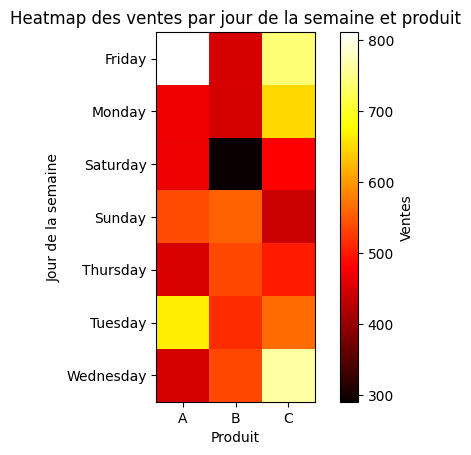

In [ ]:
df['Jour_de_la_semaine'] = df['Date'].dt.day_name()
heatmap_data = df.pivot_table(index='Jour_de_la_semaine', columns='Produit', values='Ventes', aggfunc='mean')
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Ventes')
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.title('Heatmap des ventes par jour de la semaine et produit')
plt.xlabel('Produit')
plt.ylabel('Jour de la semaine')
plt.show()

9. **Tracé de répartition des ventes par produit** :
   Tracez un tracé de répartition montrant la distribution des ventes par produit.

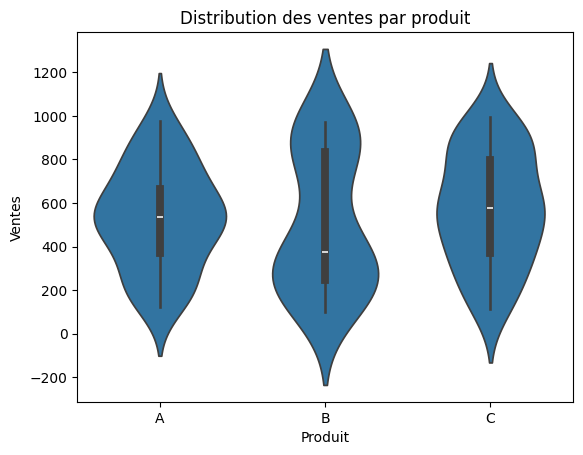

In [ ]:
import seaborn as sns

sns.violinplot(x='Produit', y='Ventes', data=df)
plt.title('Distribution des ventes par produit')
plt.xlabel('Produit')
plt.ylabel('Ventes')
plt.show()

10. **Diagramme en barres des ventes mensuelles cumulatives** :
    Tracez un diagramme en barres montrant les ventes mensuelles cumulatives.

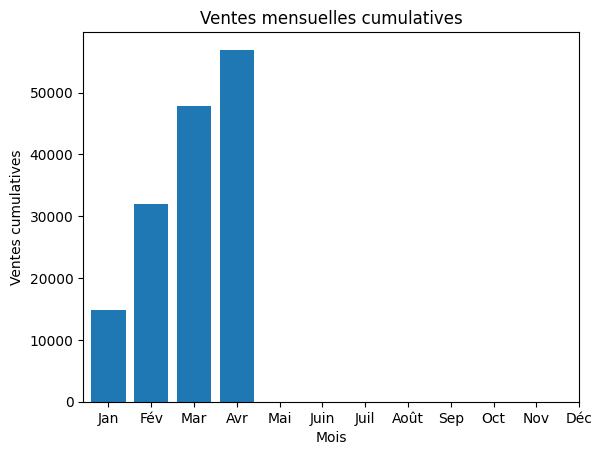

In [ ]:
df['Mois'] = df['Date'].dt.month
ventes_mensuelles_cumulatives = df.groupby('Mois')['Ventes'].sum().cumsum()
plt.bar(ventes_mensuelles_cumulatives.index, ventes_mensuelles_cumulatives)
plt.title('Ventes mensuelles cumulatives')
plt.xlabel('Mois')
plt.ylabel('Ventes cumulatives')
plt.xticks(np.arange(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
plt.show()

11. **Tracé de répartition des ventes par produit avec seaborn** :
    Tracez un tracé de répartition montrant la distribution des ventes par produit.

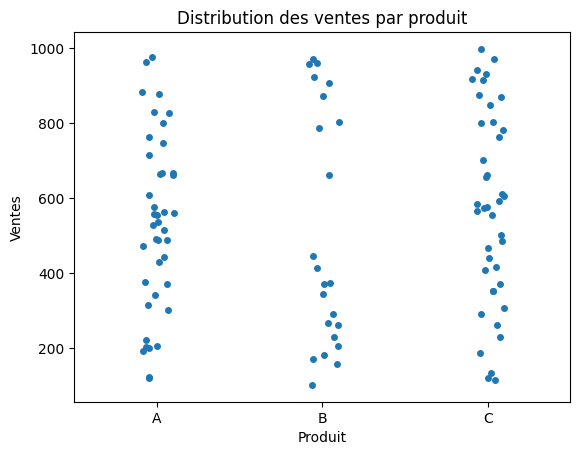

In [ ]:
sns.stripplot(x='Produit', y='Ventes', data=df, jitter=True)
plt.title('Distribution des ventes par produit')
plt.xlabel('Produit')
plt.ylabel('Ventes')
plt.show()

12. **Graphique à barres empilées des ventes par produit et par mois** :
    Tracez un graphique à barres empilées montrant les ventes par produit pour chaque mois.

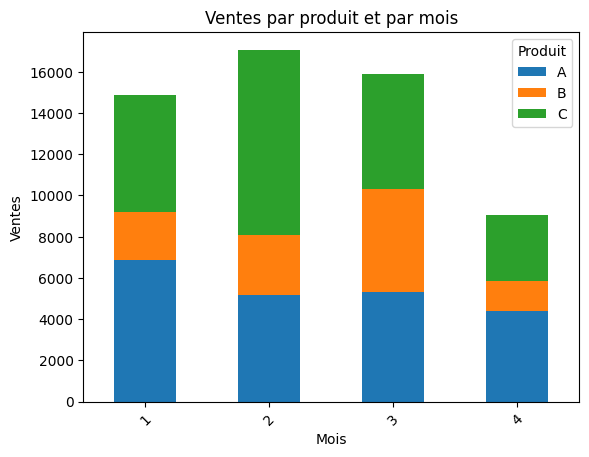

In [ ]:
pivot_table = df.pivot_table(index='Mois', columns='Produit', values='Ventes', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=True)
plt.title('Ventes par produit et par mois')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend(title='Produit')
plt.xticks(rotation=45)
plt.show()

13. **Nuage de points avec régression linéaire des ventes par date** :
    Tracez un nuage de points avec une ligne de régression linéaire montrant la relation entre les ventes et la date.

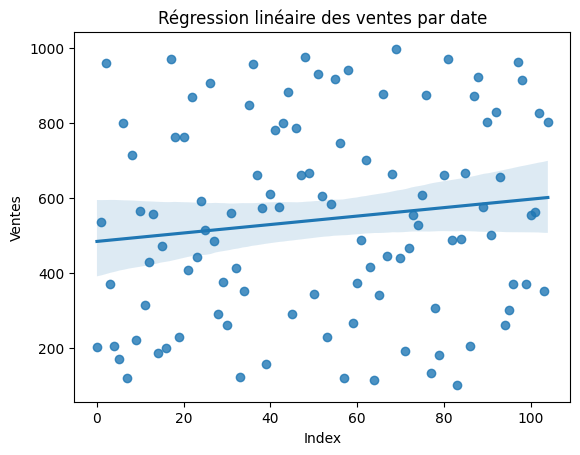

In [ ]:
sns.regplot(x=df.index, y='Ventes', data=df)
plt.title('Régression linéaire des ventes par date')
plt.xlabel('Index')
plt.ylabel('Ventes')
plt.show()

14. **Tracé de répartition des ventes par produit avec des barres d'erreur** :
    Tracez un tracé de répartition avec des barres d'erreur montrant la distribution des ventes par produit.

C:\Users\stych\AppData\Local\Temp\ipykernel_5880\358941037.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Produit', y='Ventes', data=df, ci='sd')


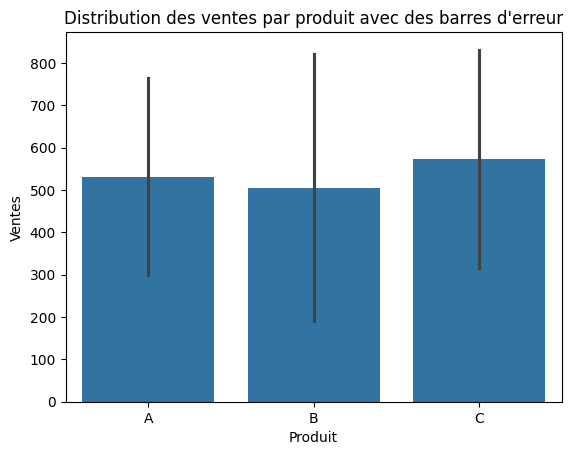

In [ ]:
sns.barplot(x='Produit', y='Ventes', data=df, ci='sd')
plt.title('Distribution des ventes par produit avec des barres d\'erreur')
plt.xlabel('Produit')
plt.ylabel('Ventes')
plt.show()